# Summary of What We Did

- We observed the data and identified any **NaN values**.  
- Checked the **data visualization**.  
- Examined the **relationships** between features.  
- Found that the relationships were good and the data was well-distributed.  
- **Standardized the data** using a Standard Scaler.  
- Split the dataset into **training and testing sets**.  
- **Trained the model** using `fit()` by passing `(X_train, y_train)`.  
- Made **predictions** on the test data.  
- **Saved the model** using `pickle`.  
- Tested the saved model by **loading it with pickle**.

# Now its time to check how good in our model.

Lets check how well model fits on train data. First let's prepare the code for today's class.

In [8]:
#Lets Start with importing necessary libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')

#Fill the null values.
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

#Removing the unnecessary column (Serial No.)
data=data.drop(columns=['Serial No.'])

#Divide dataset into Features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

#Data Scaling Fomula z =(x-mean)/std 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

#Formula is = x_train,x_test,y_train,y_test = train_test_split(standard_scaler,labels,test_size,random_state)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=127855741)
y_train.head()

#Model instantiation and training
regression=LinearRegression()
regression.fit(x_train,y_train)

print("Chance of Admission is : ",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82722916]


**Accuracny Check:** It checks the score the accuracy of the model by using Adjusted R2 metric.

In [10]:
#Adjusted R2
regression.score(x_train,y_train)

#Training Score, so that how I am going to check how good my model understood the training data.

0.8133859783776154

In [12]:
#How Well my model will understand testing data. Lets check how well the model fits the test data
regression.score(x_test,y_test)

0.8364713048475854

**Q:** Why is the test score usually lower than the training score?

**A:** The training score is usually higher because the model has already seen the training data.
It “remembers” patterns from the training set, so it performs very well on it.

On the other hand, the test data is unseen by the model.
Since the model has not been exposed to the test data, the performance (test score) is usually lower than the training score.

In [14]:
y_pred =(regression.predict(x_test))
y_pred

array([0.68684934, 0.47360976, 0.69649657, 0.4870096 , 0.67019582,
       0.501734  , 0.81508441, 0.83990546, 0.74236212, 0.78839599,
       0.7172982 , 0.76615348, 0.62431795, 0.64910356, 0.71868321,
       0.67298911, 0.83152472, 0.55942307, 0.71688681, 0.95593049,
       0.69345768, 0.62048356, 0.63248203, 0.71910217, 0.58053558,
       0.65828842, 0.42197674, 0.59732207, 0.63702849, 0.78744457,
       0.72033491, 0.62304747, 0.95595198, 0.65207263, 0.82952267,
       0.9301937 , 0.70265759, 0.54387599, 0.56502559, 0.75295423,
       0.86448735, 0.96286559, 0.58536461, 0.96109578, 0.72035267,
       0.9641533 , 0.70662077, 1.00002645, 0.71543514, 0.782229  ,
       0.91466534, 0.72865661, 0.60577183, 0.45600014, 0.61004492,
       0.74031626, 0.95761595, 0.54057511, 0.77883461, 0.87074719,
       0.63451543, 0.94619578, 0.65765596, 0.79662934, 0.71310339,
       0.80238956, 0.65046862, 0.53599474, 0.80394234, 0.6880485 ,
       0.78528238, 0.73187505, 0.86445912, 0.69263164, 0.91268

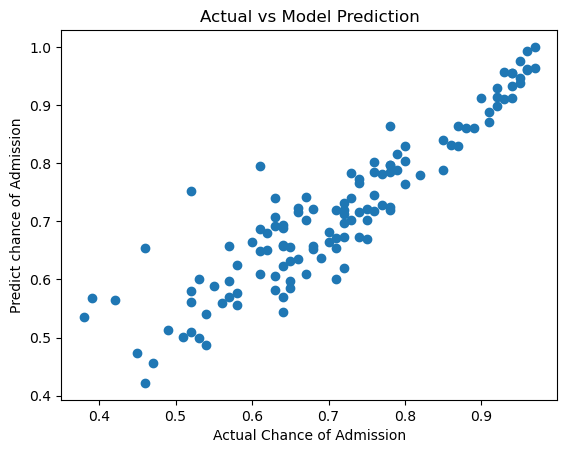

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

# Model Evaluation → Metrics

**R2** and **Adjusted R2** metrics will tell how good our model is but below metrics will tell how bad our model is by finding errors. Let's see.

**Below metrics are also known as:**

## Loss Function or Cost Function
**Mean Absolute Error (MAE):**  
Represents the average error. You calculate the error for every data point and then take the average.  

\$[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\$]  

- n = number of rows

\$[|y_i - \hat{y}_i|\$]

- this meant to use mod value
---

**Mean Squared Error (MSE):**  
Similar to MAE, but larger errors are **exaggerated** and “punished.”  
It is harder to interpret than MAE because it is not in the base units, but it is generally more popular.  

\$[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\$]  

- Instead of mod in MAE, in MSE we use square
(It can handle outliers by giving more weight to larger errors.)

---

**Root Mean Squared Error (RMSE):**  
The most popular metric. It is similar to MSE, but the result is **square-rooted** to bring it back to the base units, making it more interpretable.  
It is recommended to use RMSE as the **primary metric** to interpret your model.  

\$[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\$]  

- Using under root of MSE becomes RMSE
---

Clients often ask:  
*"Tell me in terms of a single number, how much error will your model make?"*  
They don’t want errors for each record individually, especially when there are thousands or lakhs of records.  
They want an **overall measure** of error.

\$[
\text{Error} = \text{Residual} = y_i - \hat{y}_i
\$]  

Lower error indicates a **better model**.


In [18]:
#Importing MSE and MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=regression.predict(x_test)

#MAE
mean_absolute_error(y_test,y_pred)  # y_test: actual value; y_pred: prdicted value

0.041193654785064496

In [20]:
#MSE
mean_squared_error(y_test,y_pred)

0.003343206808287189

In [22]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.05782047049520774

#  We Have Sucessfully Completed Building Linear Regression Model

# Checking for Overfitting Using Regularization

Now let's see if our model is **overfitting** the training data.  

---

## Overfitting

Usually, when a model gives **very high accuracy** and very low MAE, MSE, or RMSE on training data, we start to get suspicious.  
Even clients may think: *"This model is performing wonderfully… maybe it's overfitted."*

**Example:**  
Suppose I give you **100 questions with answers** to study.  
- You study all 100 questions carefully and understand everything. You might learn **100%**.  
- Someone else might learn only **80%**.  

Now, if I conduct an exam and **90% of the questions are exactly the same** as those you studied:  
- You will score very high because you already know the answers.  

This is similar to overfitting in machine learning. Sometimes, the test data might be very similar to the training data, so the model performs exceptionally well—but it might fail on new, unseen data.

---

### Definition of Overfitting

Overfitting means the model has **memorized the training data**, and if the test dataset contains similar patterns, the model performs well.  
However, in real-world scenarios, we **cannot guarantee** that test data will always resemble training data.  
Thus, the model may fail to generalize to new, unseen data.

---

### Key Points

- **High training accuracy** + **low test accuracy** → This indicates **overfitting**.  
- Overfitting is usually caused by **high variance** and **low bias**.  

  - **High variance** → Model is too sensitive to the training data.  
  - **Low bias** → Model fits the training data very well.  

# Regularization

If you think your model is **overfitting**, we can use **regularization** to restrict the model and reduce overfitting.

- When we use regression models to train data, there is a good chance that the model will **overfit** the training dataset.  
- Regularization helps solve this problem by **restricting the degrees of freedom** of the model.  
  - In simple terms, it **reduces the number of effective parameters** (weights) in the model, especially in polynomial functions, by shrinking their corresponding coefficients.

- In linear equations, we do not want huge weights or coefficients because **small changes in weights can cause large changes in the dependent variable (y)**.  
- Regularization **constrains the weights** to avoid overfitting.

---

To regularize a model, a **shrinkage penalty** is added to the cost function.  

### Types of Regularization in Regression

- **LASSO**  (L1 Regularizer) → Shrinks some weights to zero (can remove features).  
- **Ridge**  (L2 Regularizer) → Shrinks all weights but keeps all features.  
- **Elastic Net** → Combines LASSO and Ridge.


| x (Hours Studied) | y (Actual Score) | ŷ (Predicted Score) | Squared Error (yᵢ − ŷᵢ)² |
|-------------------|------------------|---------------------|----------------------------|
| 1                 | 2                | 2.8                 | 0.64                       |
| 2                 | 4                | 3.4                 | 0.36                       |
| 3                 | 5                | 4.0                 | 1.00                       |
| 4                 | 4                | 4.6                 | 0.36                       |
| 5                 | 5                | 5.2                 | 0.04                       |


# Types of Regularization

## 1. LASSO (Least Absolute Shrinkage and Selection Operator)

- Also called **L1 regularization** or **Feature Selction Technique.**
- LASSO **reduces the size of coefficients** by adding a penalty based on the **sum of absolute values** of the coefficients.  
- Formula:  

\$[
\text{Regularization} = \lambda \sum |\beta_j|
\$]  

- Here, **λ** (lambda) is called the **shrinkage factor** – it controls how much we shrink the coefficients.

---

## 2. Ridge Regression

- Also called **L2 regularization** or **Overfitting Reduction Technique.** 
- Ridge regression **reduces the size of coefficients** by adding a penalty based on the **sum of squares** of the coefficients.  
- Formula:  

\$[
\text{Regularization} = \lambda \sum \beta_j^2
\$]  

- Just like LASSO, **λ** controls how much the coefficients are shrunk.


![grad1.png](grad1.png)

Zero error is not possible. Every human and every model will make mistakes – nobody is 100% perfect. No model can be perfect, but we try to get as close as possible.  

During this process, we are trying to understand the data. The goal is to reach the **global minimum** quickly.  

However, we **don't want the model to learn too fast**. It's better to learn slowly so that it can gradually get as close as possible to the global minimum.

# Generalized Model

A **generalized model** can make predictions on **any test data**, whether it has seen it before or not.  
It does not matter if the data is new or different – the model can still predict accurately.  
This is what it means for a model to **generalize**.

# Difference Between LASSO and Ridge

Suppose I want to **predict a salary**.  
I have the following features for a person:  

- Experience  
- Skills  
- Current Salary  
- Email  
- Pincode  

Example:  
- Current Salary = 5 LPA  
- Experience = 2.5 years  

I want to predict their **future salary**.  

Here:  
- **Features (inputs):** Email, Pincode, Experience, Skills, Current Salary  
- **Label (output):** Predicted Salary

Email and Pincode do not contribute anything to predicting salary.  

---

# LASSO (L1)

- If we use **LASSO (L1)**, it will internally try to understand the relationship between features and the target (label).  
- LASSO identifies which features are important. If a feature has **no relationship** with the target, LASSO will **ignore it** and assign it **zero importance**.  
- **LASSO acts like a feature selection tool**, removing unwanted features automatically.

---

# Ridge (L2)

- Ridge is similar to L1, but instead of removing features completely, it **reduces their importance**.  
- Important features keep high importance, while unimportant features get a **very small weight** (e.g., 0.01%).  
- **Ridge does not act as a feature selector**; it just shrinks coefficients to avoid overfitting.

---

**Key Difference:**  
- **LASSO** → Can remove features (feature selection)  
- **Ridge** → Shrinks coefficients but keeps all features


#  Why we use Regularization?

If your model is learning too fast, we have to basically penalise, we have to make it learn as slow as possible so that it achieves the better result thats why we need regularization.

# Lets See Practically.

In [3]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

**Q:** Why am I importing this?  

**A:** Because I feel that the linear regression model is overfitting.  
Now, I am trying to build another model.

---

Remember, we talked about **learning rate** – how fast or slow the model should learn.  
We can find the best learning rate using **RidgeCV** or **LassoCV**.

- **CV** → Cross Validation  
- The learning rate is also called **λ (lambda)** or **alpha**.

---

So, to get the best learning rate, the first thing we need is to determine the **λ (lambda) / alpha rate**.

In [24]:
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm

lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

# max_iter

- This determines **how many times the model should iterate**.  
- The number of iterations depends on the **size of your dataset**.

In [27]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha=0.00014579541631124367)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00014579541631124367)

In [29]:
lasso_reg.score(x_test,y_test)

0.8365699190276328

So, what does this indicate?  

- We tried **LASSO regression** because we thought the linear regression model might be overfitted.  
- However, we are getting **the same results** with both linear regression and LASSO.  
- This means our model is **not overfitted**.  

**Conclusion:** The model is performing well and is not overfitting the data.

# Using Ridge Regression Model

- Ridge regression will return the **best alpha** and **coefficients** after performing **10-fold cross-validation**.

In [33]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [46]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))  # 0.001 - start, 0.1 - end and 0.01 - step size
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

# Applying Different Methods

This time, we are applying a **different approach**.  
- You can remove `alpha = np.arange(0.001, 0.1, 0.0)` and keep it as `None`.  
- The idea is to **try different ways** to find the best learning rate.  

Remember, if we let the model try **0.001, 0.002, 0.003, ...** one by one, it will **waste a lot of time**.  

In our dataset, we have very few columns and records.  
- In real-life scenarios, we may have **thousands of features** and **millions of observations**.  
- Using LASSO on such large data will take **a lot of time and memory**, which increases **cost**.  

We cannot train such large models on our local machines.  
- We need **cloud platforms** like **AWS, GCP, or Azure**.  
- Training on the cloud costs money, so wasting time also wastes resources.  

**Solution:**  
- Instead of trying all possible alphas, we give a **small range**.  
- Within this range, the model will find the **best alpha** efficiently without wasting time or resources.


In [38]:
ridgecv.alpha_

0.09099999999999998

In [40]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [42]:
ridge_model.score(x_test,y_test)

0.8364634414143279

We got around the **same R²** using Ridge regression as well.  
So, it is safe to say that there is **no overfitting**.

---

Now, you may ask: *Why did we run all these models?*  

- As a data scientist, I am **greedy for accuracy**. I want the best possible performance.  
- In real-world projects, we **never rely on a single model**. We build **multiple models** for the same problem.  

**Why multiple models?**  
- Each model behaves differently and may capture patterns in a different way.  
- For example, one model may give **50% accuracy**, while another gives **60%**.  
- We do not know in advance which model will perform best.  

**Process:**  
- Build multiple models.  
- Compare their performance.  
- Choose the model with the **best accuracy** for real-time use.  

---

By using different types of regularization, we are still getting the **same R² score**.  
This indicates that the **OLS model** has been well-trained and there is **no overfitting**.


# Lets See the underlying assumptions 
- The regression model is linear in terms of coefficeints and error term.

- The mean of the residual is zero

- The error terms are not corellated with each other  . i.e given error value ; we cannot predict the next error value.


- No , Multicollinearity , i.e no independent variables should be correlated with each other or affect one another , if there is  Multicollinearity this Precision of prediction by the ols model decrese 

- The error terms are normally distributed.